The dataset has come from the open source network analyzing software `"Wireshark"`. The dataset contains information about `network packets` that had been exchanged between client and server technologies, where network devices (routers and swithces) were used as a medium. `"Network packet"` or `"packet"` is a unit of data that is transmitted over a network. It's the basic unit of communication in network protocols such as the Internet Protocol. A packet typically consists of two main parts: `the header` and `the payload`. `The header` contains control information such as the source and destination addresses, protocol information, packet sequence number, and error detection codes. `The payload` contains the actual data being transmitted. The source dataset does not provide information about header and payload and that must be due to privacy.

The dataset also contains information about whether the network packets class is `normal` or `non-normal`, i.e. have been used to perform network attacks.

### 1.1 Data Dictionary

To help us with our analysis, let's take a look at the data dictionary down below.

#### Packet source and destination information
- SRC_ADD (numeric). Source (client) IP address. Due to sensitivty, IP address has been anonymized.
- DES_ADD (numeric). Destination (server) IP address. Due to sensitivty, IP address has been anonymized.
- FROM_NODE (numeric). Identifier (IP) for the source node in the network. This is the source node for the packets under the consideration. The source nodes are clients, servers, switches and routers indicating where the packets have originated from.
- TO_NODE (numeric). Identifier (IP) for the destination node in the network. This is the destination node for the packets under the consideration. The destination nodes are clients, servers, switches and routers indicating which device will receive the packets.
- NODE_NAME_FROM (object). Same as FROM_NODE but identifier is a hostname.
- NODE_NAME_TO (object). Same as TO_NODE but identifier is a hostname.

#### Packet size information

- PKT_SIZE (numeric). Size of the network packet in bytes.
- NUMBER_OF_BYTE (numeric). The total number of bytes transmitted within a flow or connection.
- PKT_AVG_SIZE (numeric). The average amount of data (in bytes) per each packet exchanged between network nodes. 

#### All other information about packet and network.
- PKT_ID (numeric). Unique identifier of a network packet.
- PKT_TYPE (object). Common packet types: 

a. TCP (Transmission Control Protocol). TCP is a connection-oriented protocol used for reliable and ordered data transmission. 

b. UDP (User Datagram Protocol). UDP is a connectionless protocol used for fast and lightweight data transmission.

c. ICMP (Internet Control Message Protocol). ICMP is a network-layer protocol used for error reporting and diagnostics. Common packet types associated with ICMP include:
"echo request" and "reply" that are used for ping tests to check network connectivity.
- FLAGS (object). TCP flags or control bits associated with a TCP packet. TCP uses a set of control flags to indicate various aspects of packet behavior, such as the SYN (synchronize), ACK (acknowledge), FIN (finish), RST (reset), and others.
- FID (numeric). Flow Identifier. A unique identifier associated with a flow of network traffic. A flow is a unidirectional sequence of packets between a specific source and destination, typically identified by their IP addresses and port numbers.
- SEQ_NUMBER (numeric). Sequence Number. Sequence number of a TCP packet within a TCP connection. TCP uses sequence numbers to ensure the ordered delivery of data segments and to detect and recover from packet loss or reordering.
- NUMBER_OF_PKT (numeric). Number of Packets. The total number of packets transmitted within a flow or connection.
- PKT_RATE (numeric). Packet transmission rate. Packet transmission rate, measured in packets per second (pps) or packets per unit time.
- BYTE_RATE (numeric). The rate at which bytes are transmitted or received over the network within a specific time interval. Expressed in bytes per second (B/s). 
- UTILIZATION (numeric). Utilization of a network link or resource. The degree to which the network link or resource is being used, expressed as a percentage.

#### Field of interest
- PKT_CLASS. Packet class. Target value indicating class of the packet.

#### Question of interest

How to identify malicious traffic that intends to disrupt the normal operation of a network, service, or website. The goal of network attack is to overwhelm the target with a flood of traffic, making it inaccessible to legitimate users.

This notebook contains the steps taken to preprocess the dataset. The outcome of this file is preprocessed data that can be used by other notebooks for analysis.

## 2. Load data

### 2.1 Laoding data

In [2]:
import pandas as pd

In [2]:
network_df = pd.read_csv("C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/datasets/final-dataset.csv")

In [4]:
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


## 3. EDA

Wireshark has provided us with this snapshot of network traffic. First, let's take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Check
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


In [5]:
# How much data are we working with here?
print(network_df.shape)

(2160668, 28)


In [6]:
print(f'Our dataframe has {network_df.shape[0]} rows and {network_df.shape[1]} columns.')

Our dataframe has 2160668 rows and 28 columns.


We have `2 160 668` rows of `28` different variables that were provided. However, there may be some concerns as there does not appear to be a unique packet identifier. `PKT_ID` has duplicates since one packet travels accross network devices (nodes) to get to the destination, so the same 'PKT_ID' appears in the dataset several times. We will proceed with caution, and check for duplicates in the data.

Next steps:

- Check datatypes and formats
- Check for duplicate data (is the data unique on the row and column level?)
- Check for missing data

### 3.1 Check datatypes and missing data

First we will investigate the structure and format of the data to make sure that nothing is missed.

In [7]:
network_df.head(4)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal


We see a variety of numerical (int/float) and non-numeric columns. Furthermore:

In [8]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [9]:
# Count the number of null or empty values in each column
null_columns = network_df.isnull().sum()  # Count null values in each column
empty_columns = (network_df == '').sum()  # Count empty values in each column

# Total number of null or empty values in each column
total_null_empty_columns = null_columns + empty_columns

print("Number of null or empty columns:")
print(total_null_empty_columns)

Number of null or empty columns:
SRC_ADD             0
DES_ADD             0
PKT_ID              0
FROM_NODE           0
TO_NODE             0
PKT_TYPE            0
PKT_SIZE            0
FLAGS               0
FID                 0
SEQ_NUMBER          0
NUMBER_OF_PKT       0
NUMBER_OF_BYTE      0
NODE_NAME_FROM      0
NODE_NAME_TO        0
PKT_IN              0
PKT_OUT             0
PKT_R               0
PKT_DELAY_NODE      0
PKT_RATE            0
BYTE_RATE           0
PKT_AVG_SIZE        0
UTILIZATION         0
PKT_DELAY           0
PKT_SEND_TIME       0
PKT_RESEVED_TIME    0
FIRST_PKT_SENT      0
LAST_PKT_RESEVED    0
PKT_CLASS           0
dtype: int64


<font color='red'> No null or empty values. </font>

### 3.2 Checking for duplicate data and correlation

Now that the data appears sufficiently clean, we will check for duplicate data. First, on the row level.

In [16]:
# Checking for duplicates and counting
network_df.duplicated().sum()

0

**There are no duplicate rows in the dataset.**

Let us also be thorough and check that no two columns also contain the same information.

In [33]:
#We can check if all columns in a DataFrame are unique using the nunique() method. Here's how we can do it:

# Check if all columns are unique
all_unique = (network_df.nunique()>1).all()

if all_unique:
    print("All columns are unique.")
else:
    print("There are duplicate values in some columns.")

All columns are unique.


In [34]:
# Select only numeric columns from network_df
numeric_columns = network_df.select_dtypes(include='number')

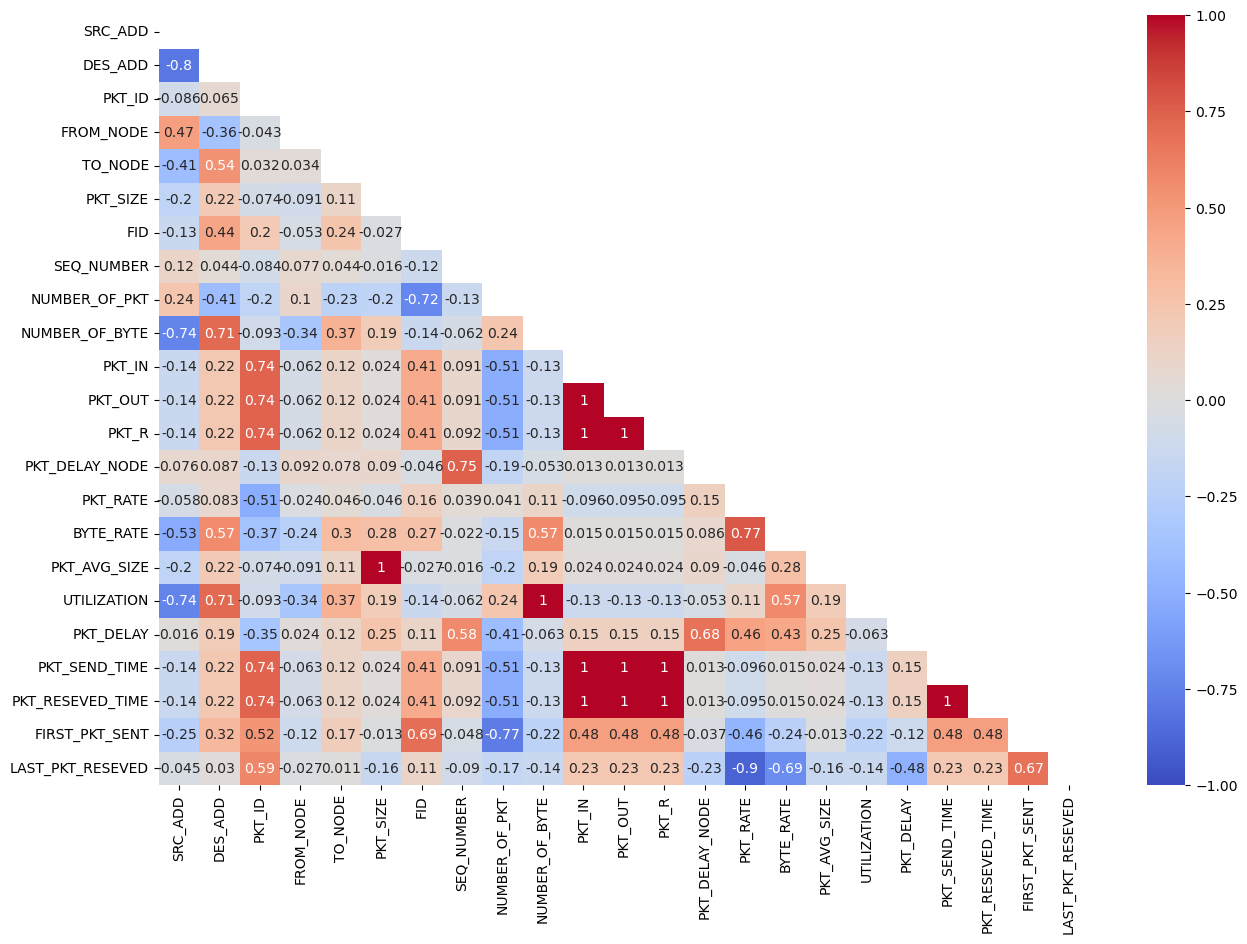

In [35]:
# Generate correlation matrix
correlation_matrix = numeric_columns.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,center=0, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

**Highly (corr>0.9) correlating items:**
* PKT_IN and PKT_OUT
* PKT-R and PKT_IN
* PKT_R and PKT_OUT
* PKT_AVG_SIZE and PKT_SIZE
* PKT_SEND_TIME and PKT_RESEVED_TIME
* UTILIZATION and NUMBER_OF_BYTE
* PKT_SENT_TIME and PKT_IN, PKT_R, PKT_OUT
* PKT_RESEVED_TIME and PKT_IN, PKT_R, PKT_OUT

So, `PKT_IN`, `PKT_OUT`, `PKT_R`, `PKT_AVG_SIZE`, `PKT_SEND_TIME` and `NUMBER_OF_BYTES` will be removed to avoid collinearity.  

In [36]:
network_df1 = network_df.drop(columns=['PKT_IN','PKT_OUT', 'PKT_R', 'PKT_AVG_SIZE', 'PKT_SEND_TIME', 'NUMBER_OF_BYTE'])

In [37]:
#checking corr once again
# Select only numeric columns from network_df
numeric_columns = network_df1.select_dtypes(include='number')

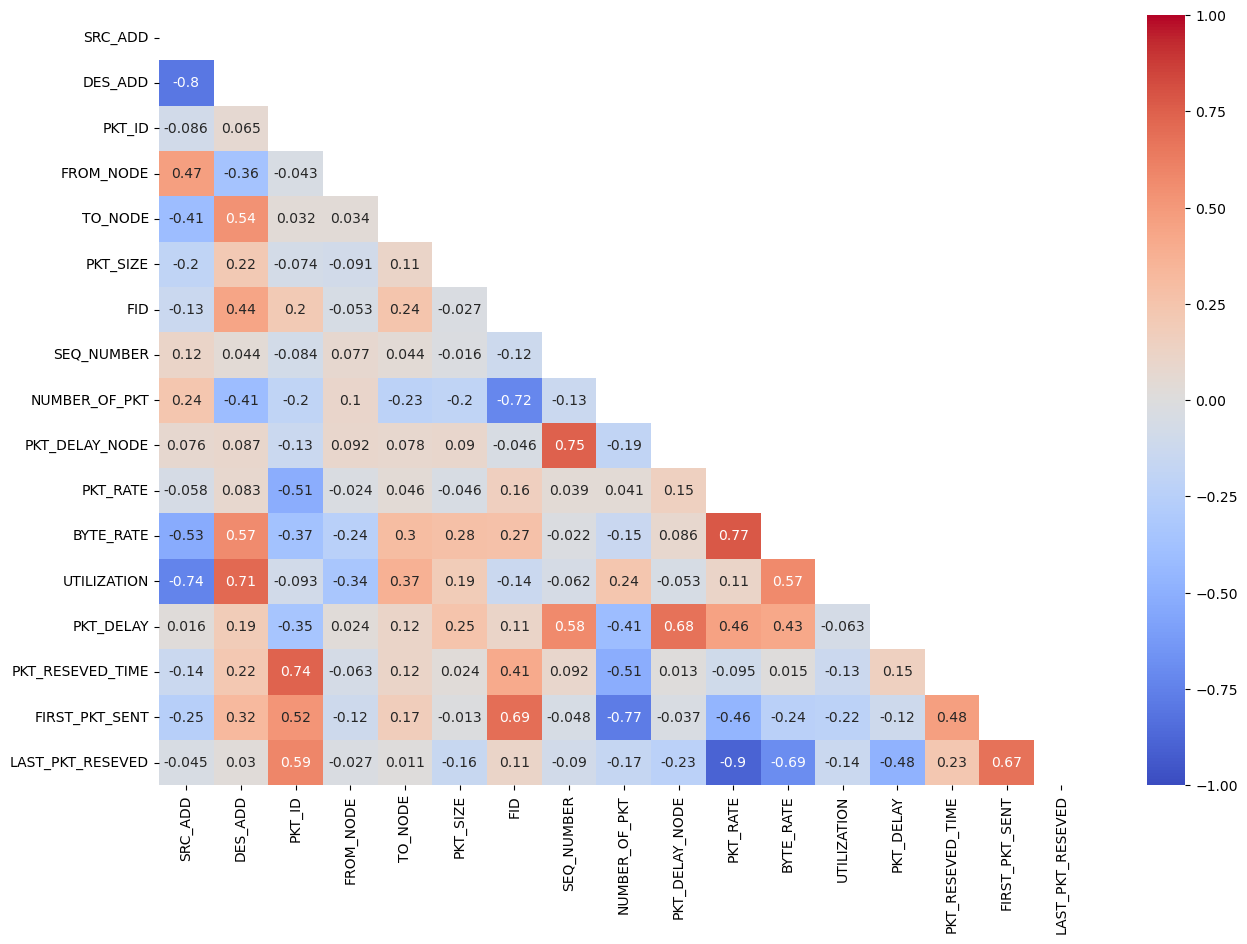

In [38]:
# Generate correlation matrix
correlation_matrix = numeric_columns.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,center=0, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

**No more highly correlated independent variables.**

### 3.3 Data Analysis

Now that we've verified that data is clean, let's do some analysis to address our original question:
<font color='red'>what are the characteristics of the packets that account for malicious network traffic? </font>

#### 3.3.1 Univariate Analysis - Categorical¶

Let's look at the variable of interest again, `PKT_CLASS`:

In [39]:
# Check the distribution of normal vs. malicisous traffic
network_df1['PKT_CLASS'].value_counts()/network_df.shape[0]*100.0

Normal        89.600022
UDP-Flood      9.318600
Smurf          0.582690
SIDDOS         0.308469
HTTP-FLOOD     0.190219
Name: PKT_CLASS, dtype: float64

<AxesSubplot: >

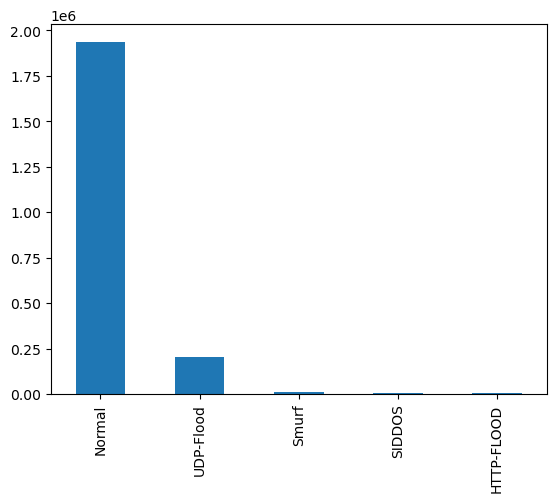

In [40]:
network_df1['PKT_CLASS'].value_counts().plot(kind='bar')

We see above, there is about a `90/10` split in 'normal' and malicious traffic. `~9%` of malicious traffic is 'UDP-Flood' and the 
rest marginally distributed between `Smurf`, `SIDDOS` and `HTTP-FLOOD`.

Let's take a look at the network traffic overall.

Split the data into categorical and numerical variables, and do some EDA for both types.



In [41]:
network_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_DELAY_NODE    float64
 14  PKT_RATE          float64
 15  BYTE_RATE         float64
 16  UTILIZATION       float64
 17  PKT_DELAY         float64
 18  PKT_RESEVED_TIME  float64
 19  FIRST_PKT_SENT    float64
 20  LAST_PKT_RESEVED  float64
 21  PKT_CLASS         object 
dtypes: float64(10), int64(7), object(5)
memory usage: 362.7+ MB


In [42]:
# Make a new dataframe of only the categorical variables
categorical_df = network_df1.select_dtypes('object').copy()

# Check
categorical_df.head()

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,tcp,-------,Switch1,Router,Normal
1,tcp,-------,Router,server1,Normal
2,ack,-------,Router,Switch2,UDP-Flood
3,ack,-------,Router,Switch1,Normal
4,ack,-------,Router,Switch1,Normal


In [43]:
network_df1.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,NODE_NAME_TO,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,Router,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,server1,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,Switch2,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,Switch1,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,Switch1,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864,Normal


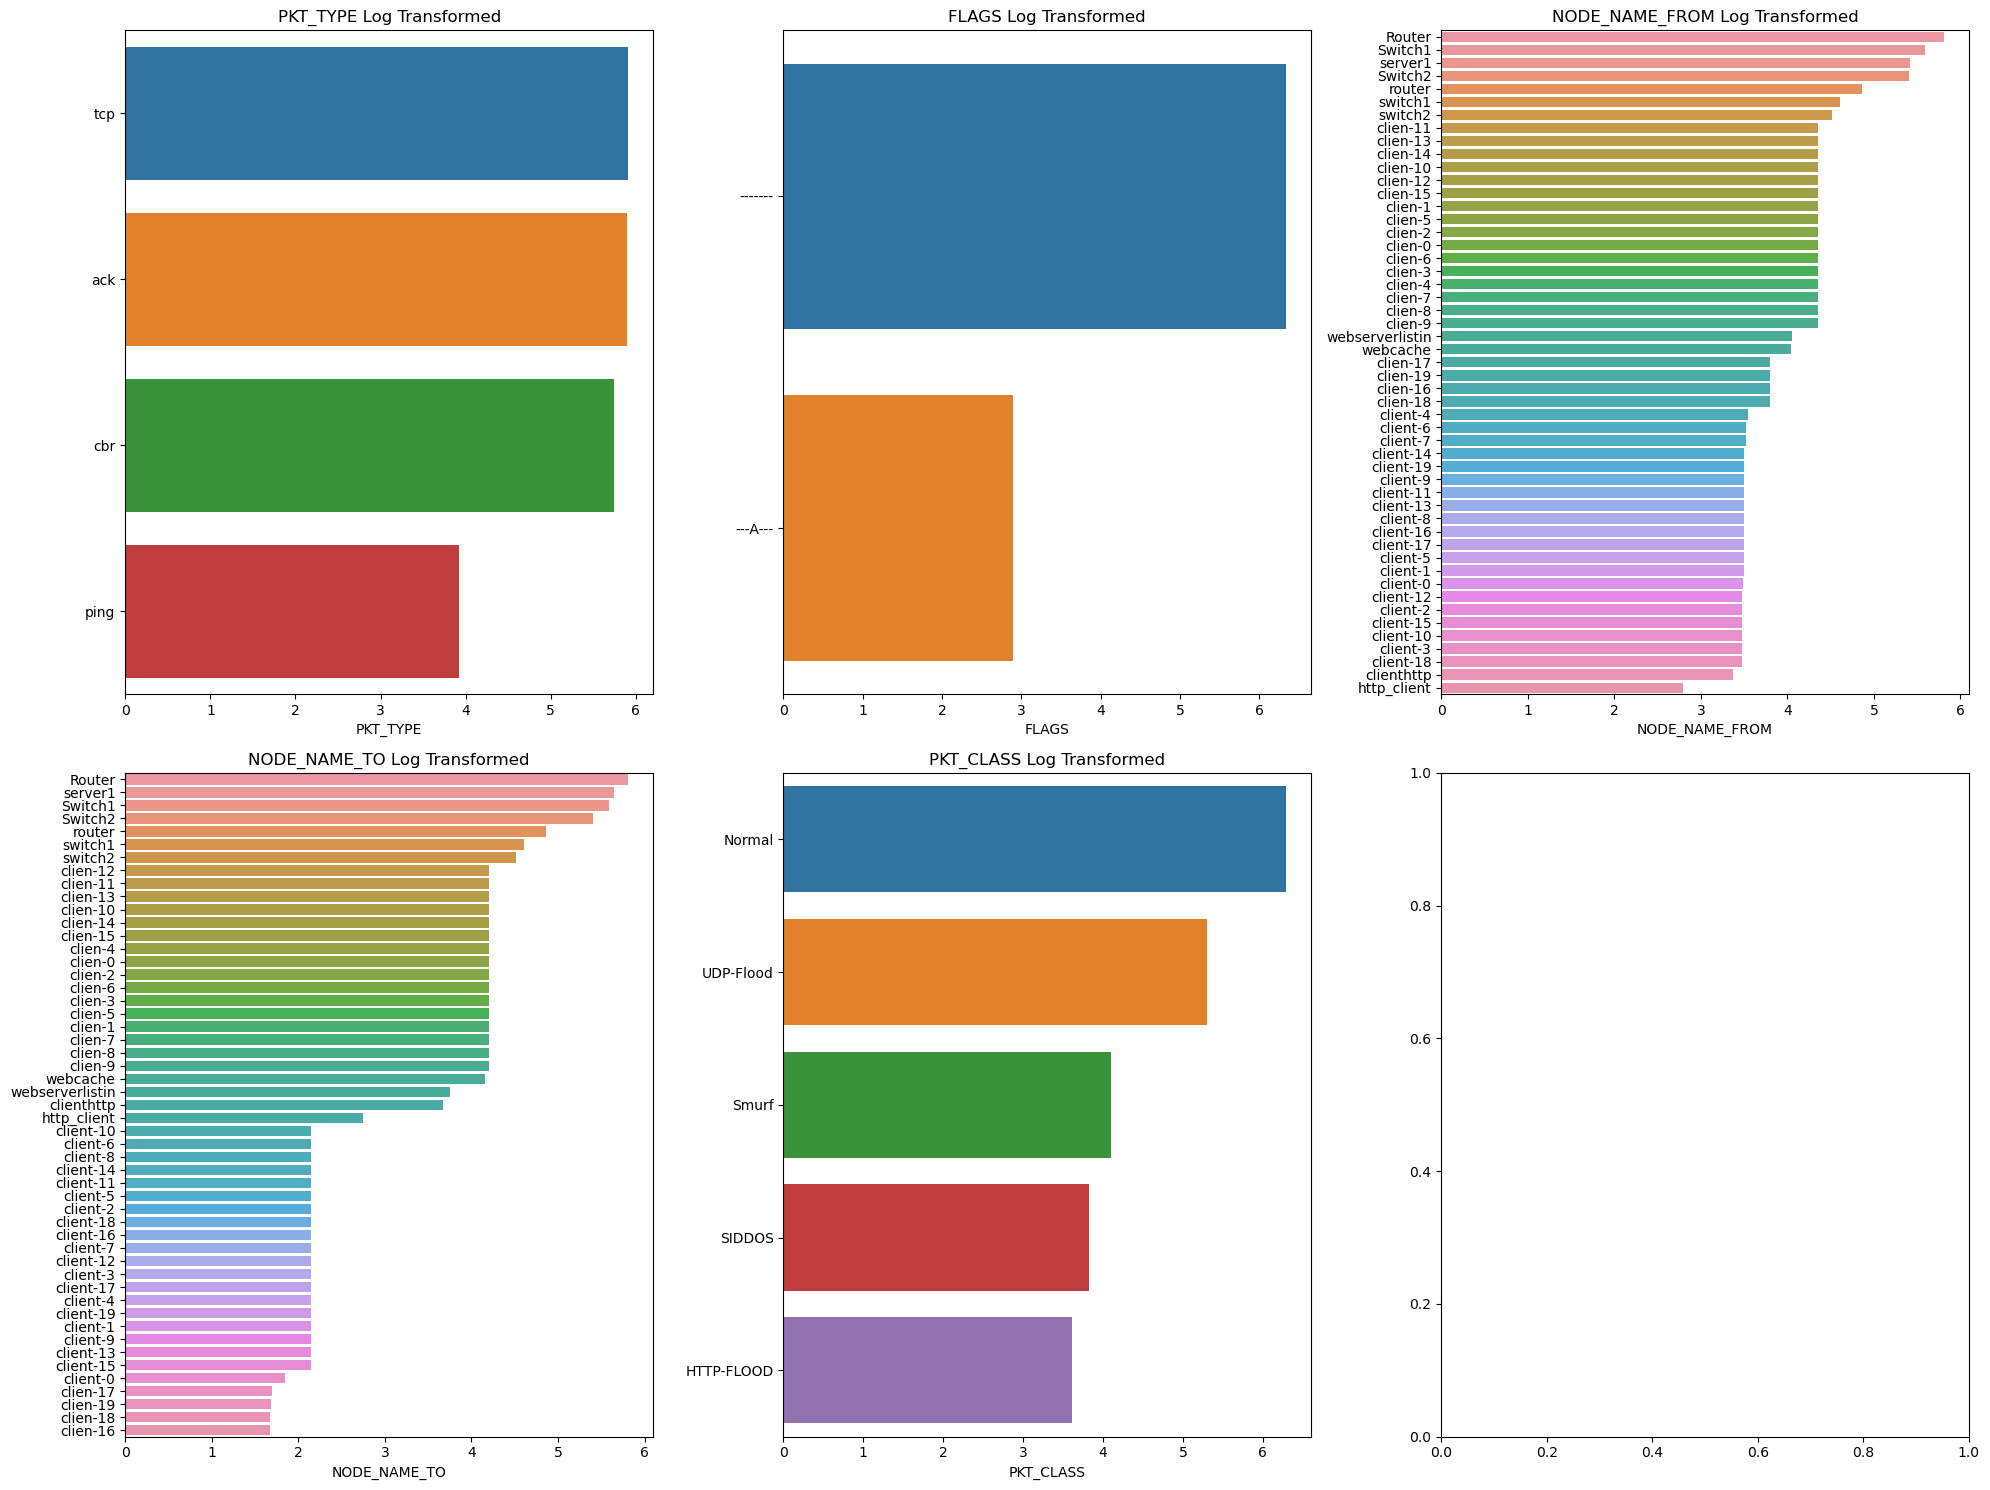

In [44]:
# visualize distribution data in each feature
col_names = categorical_df.columns
plot_num = 1

plt.subplots(2,3, figsize=(20,15))

for col in col_names:
    plt.subplot(2,3,plot_num)
    
    val= np.log10(categorical_df[col].value_counts())
    cat=categorical_df[col].value_counts().index.tolist()
    
    sns.barplot(x=val,y=cat, orient='h')
    plot_num +=1
    plt.xlabel(col)
    plt.title(col+" Log Transformed")
    
plt.tight_layout()
plt.show()

Thera are only 5 categorical variables, therefore the last subplot is empty.

In [45]:
categorical_df['FLAGS'].value_counts()

-------    2159876
---A---        792
Name: FLAGS, dtype: int64

In [46]:
categorical_df['PKT_TYPE'].value_counts()

tcp     808394
ack     787530
cbr     556344
ping      8400
Name: PKT_TYPE, dtype: int64

<font color='red'>We can see that: </font>
- The target variable (`PKT_CLASS`) is imbalanced: ~ 90% (normal)and ~ 10% (malicious)
- Majour packet types are `tcp`(~ 800K), `ack` (~ 800K) and `cbr` (~ 550K), and small amount of `ping` (~8K)
- FLAGS is exteremely imabalanced: ~2.16 mln vs 792
- The majority of network traffic goes through the routers, server and swithces
- There is only one server and 20 clients

#### 3.3.2 Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [47]:
network_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_DELAY_NODE    float64
 14  PKT_RATE          float64
 15  BYTE_RATE         float64
 16  UTILIZATION       float64
 17  PKT_DELAY         float64
 18  PKT_RESEVED_TIME  float64
 19  FIRST_PKT_SENT    float64
 20  LAST_PKT_RESEVED  float64
 21  PKT_CLASS         object 
dtypes: float64(10), int64(7), object(5)
memory usage: 362.7+ MB


In [48]:
# Get only the numeric columns
numeric_df = network_df1.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.00,24.30,389693,21,23,1540,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920
1,15.00,24.15,201196,23,24,1540,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211
2,24.15,15.00,61905,23,22,55,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221
3,24.90,9.00,443135,23,21,55,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098
4,24.80,8.00,157335,23,21,55,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864


In [49]:
numeric_df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_SIZE',
       'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 'PKT_DELAY_NODE', 'PKT_RATE',
       'BYTE_RATE', 'UTILIZATION', 'PKT_DELAY', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED'],
      dtype='object')

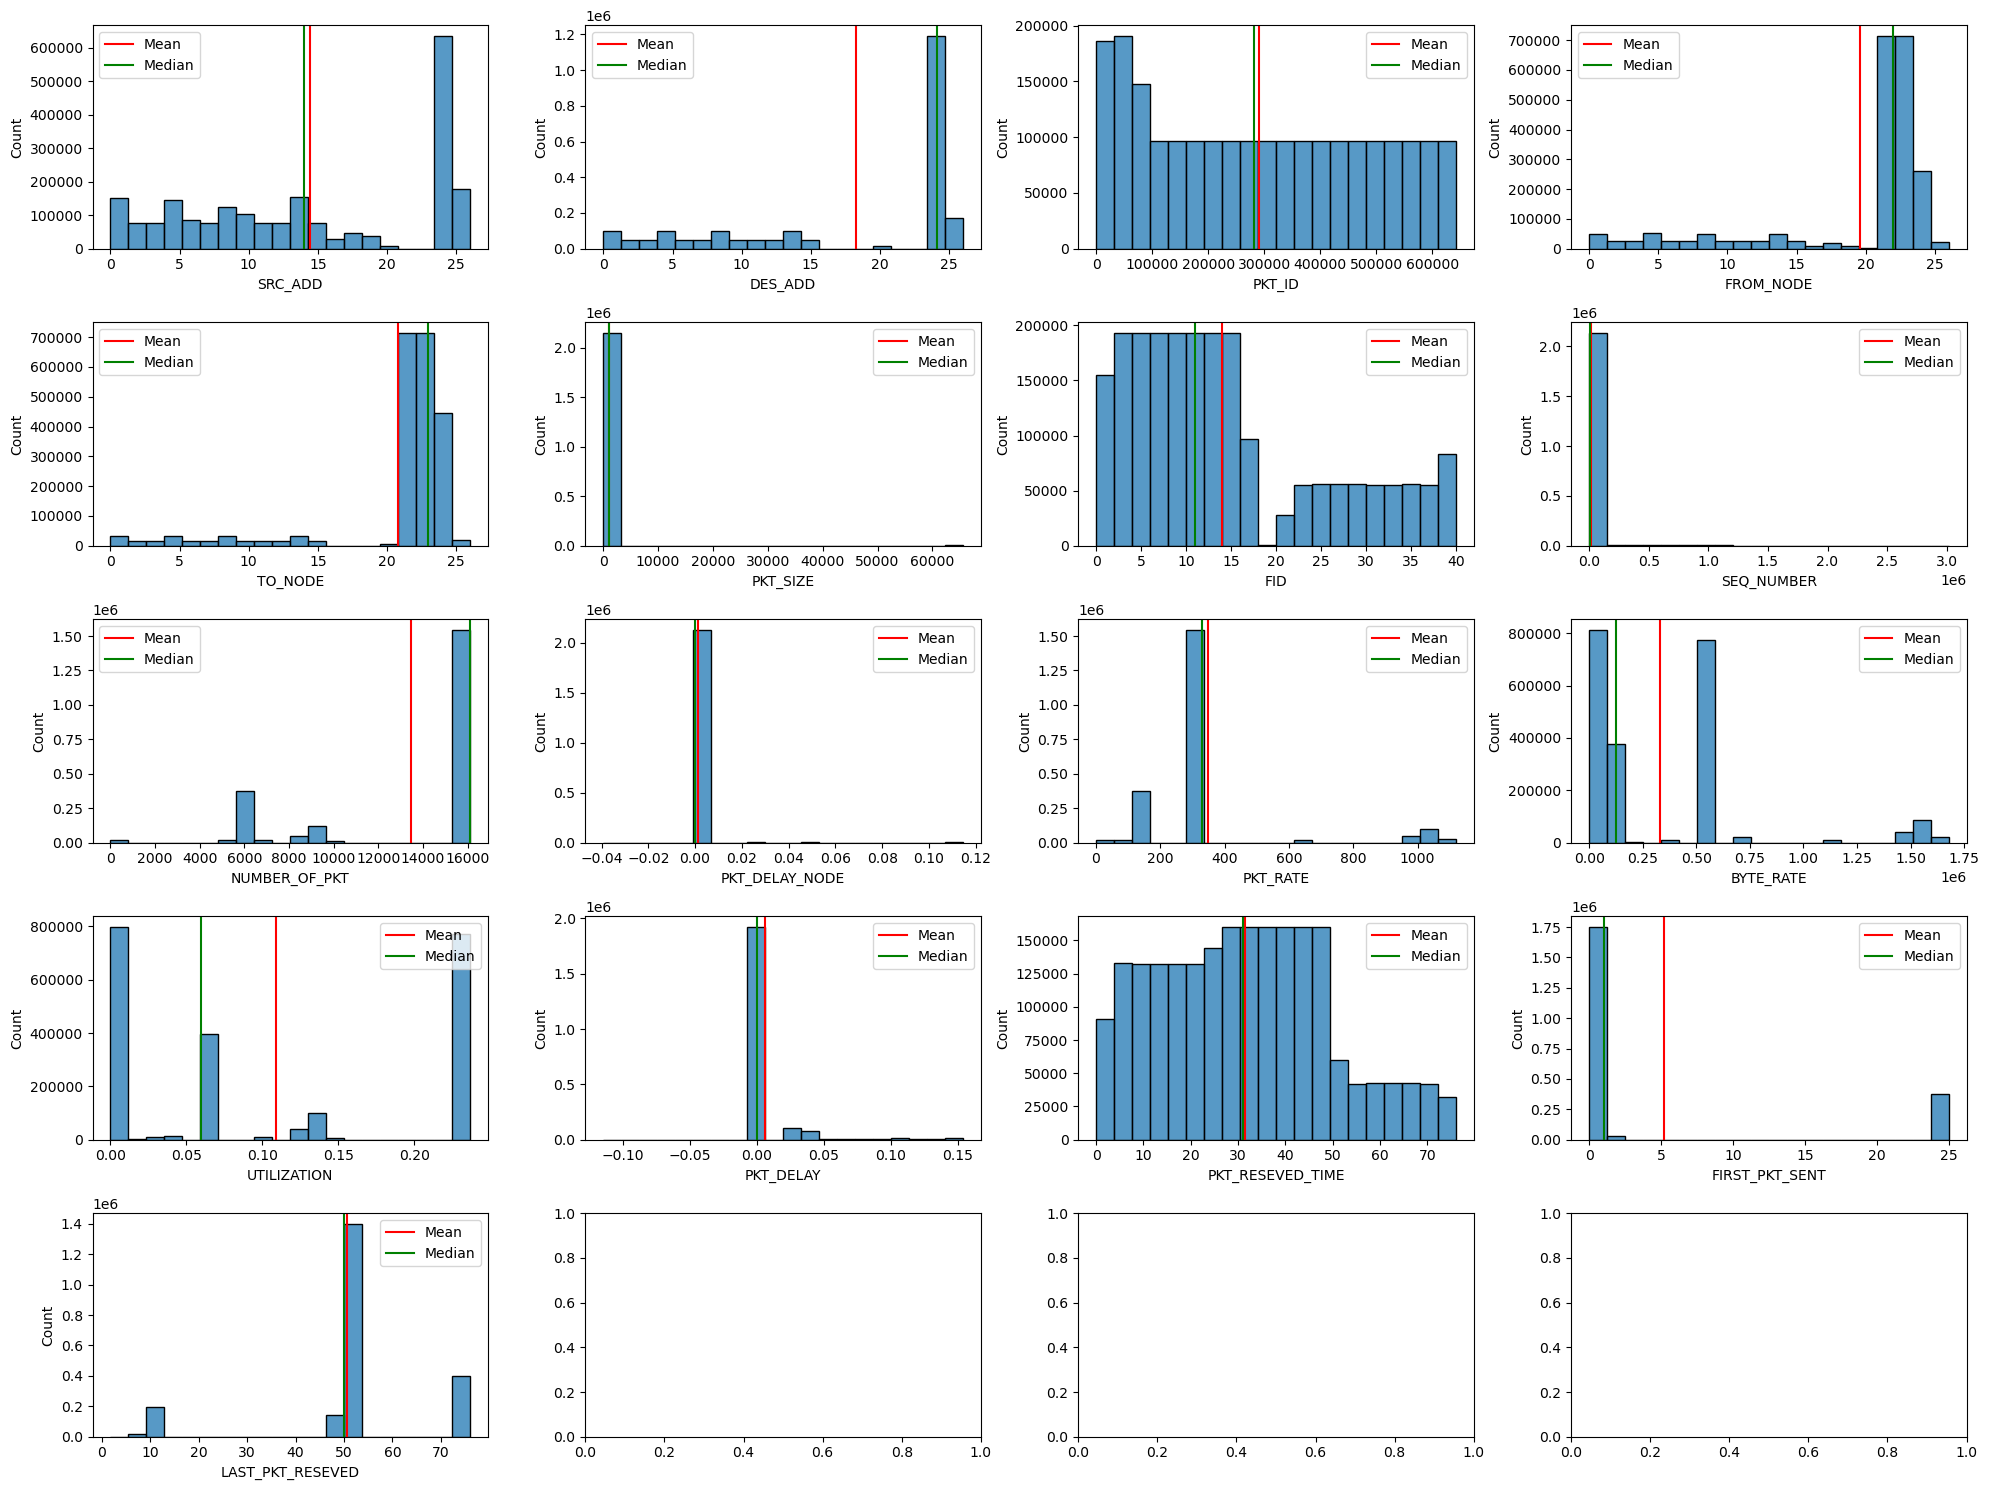

Execution time: 64.69365859031677 seconds


In [50]:
import time

# Record the start time
start_time = time.time()
# visualize distribution of unscaled data in each feature
col_names = numeric_df.columns
plot_num = 1

plt.subplots(5,4, figsize=(20,15))

for col in col_names:
    # Save column values, mean, and median to variables
    var_mean = numeric_df[col].mean()
    var_median = numeric_df[col].median()
    
    plt.subplot(5,4,plot_num)
    sns.histplot(numeric_df[col],bins=20)
    #sns.displot(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    
    plot_num +=1
    
plt.tight_layout()
plt.show()

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

The last 3 subplots are empy since there are 17 numeric variables, and shape of the subplot is 5*4.

<font color='red'> We can see that: </font>
* No normal distribution across numeric variables
* `FROM_NODE` and `TO_NODE` have similar distribution
* The distribution most resembling normal is `PKT_RESEVED_TIME`

#### 3.3.3 Bivariate - with categorical variable.

In [51]:
categorical_df.columns

Index(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], dtype='object')

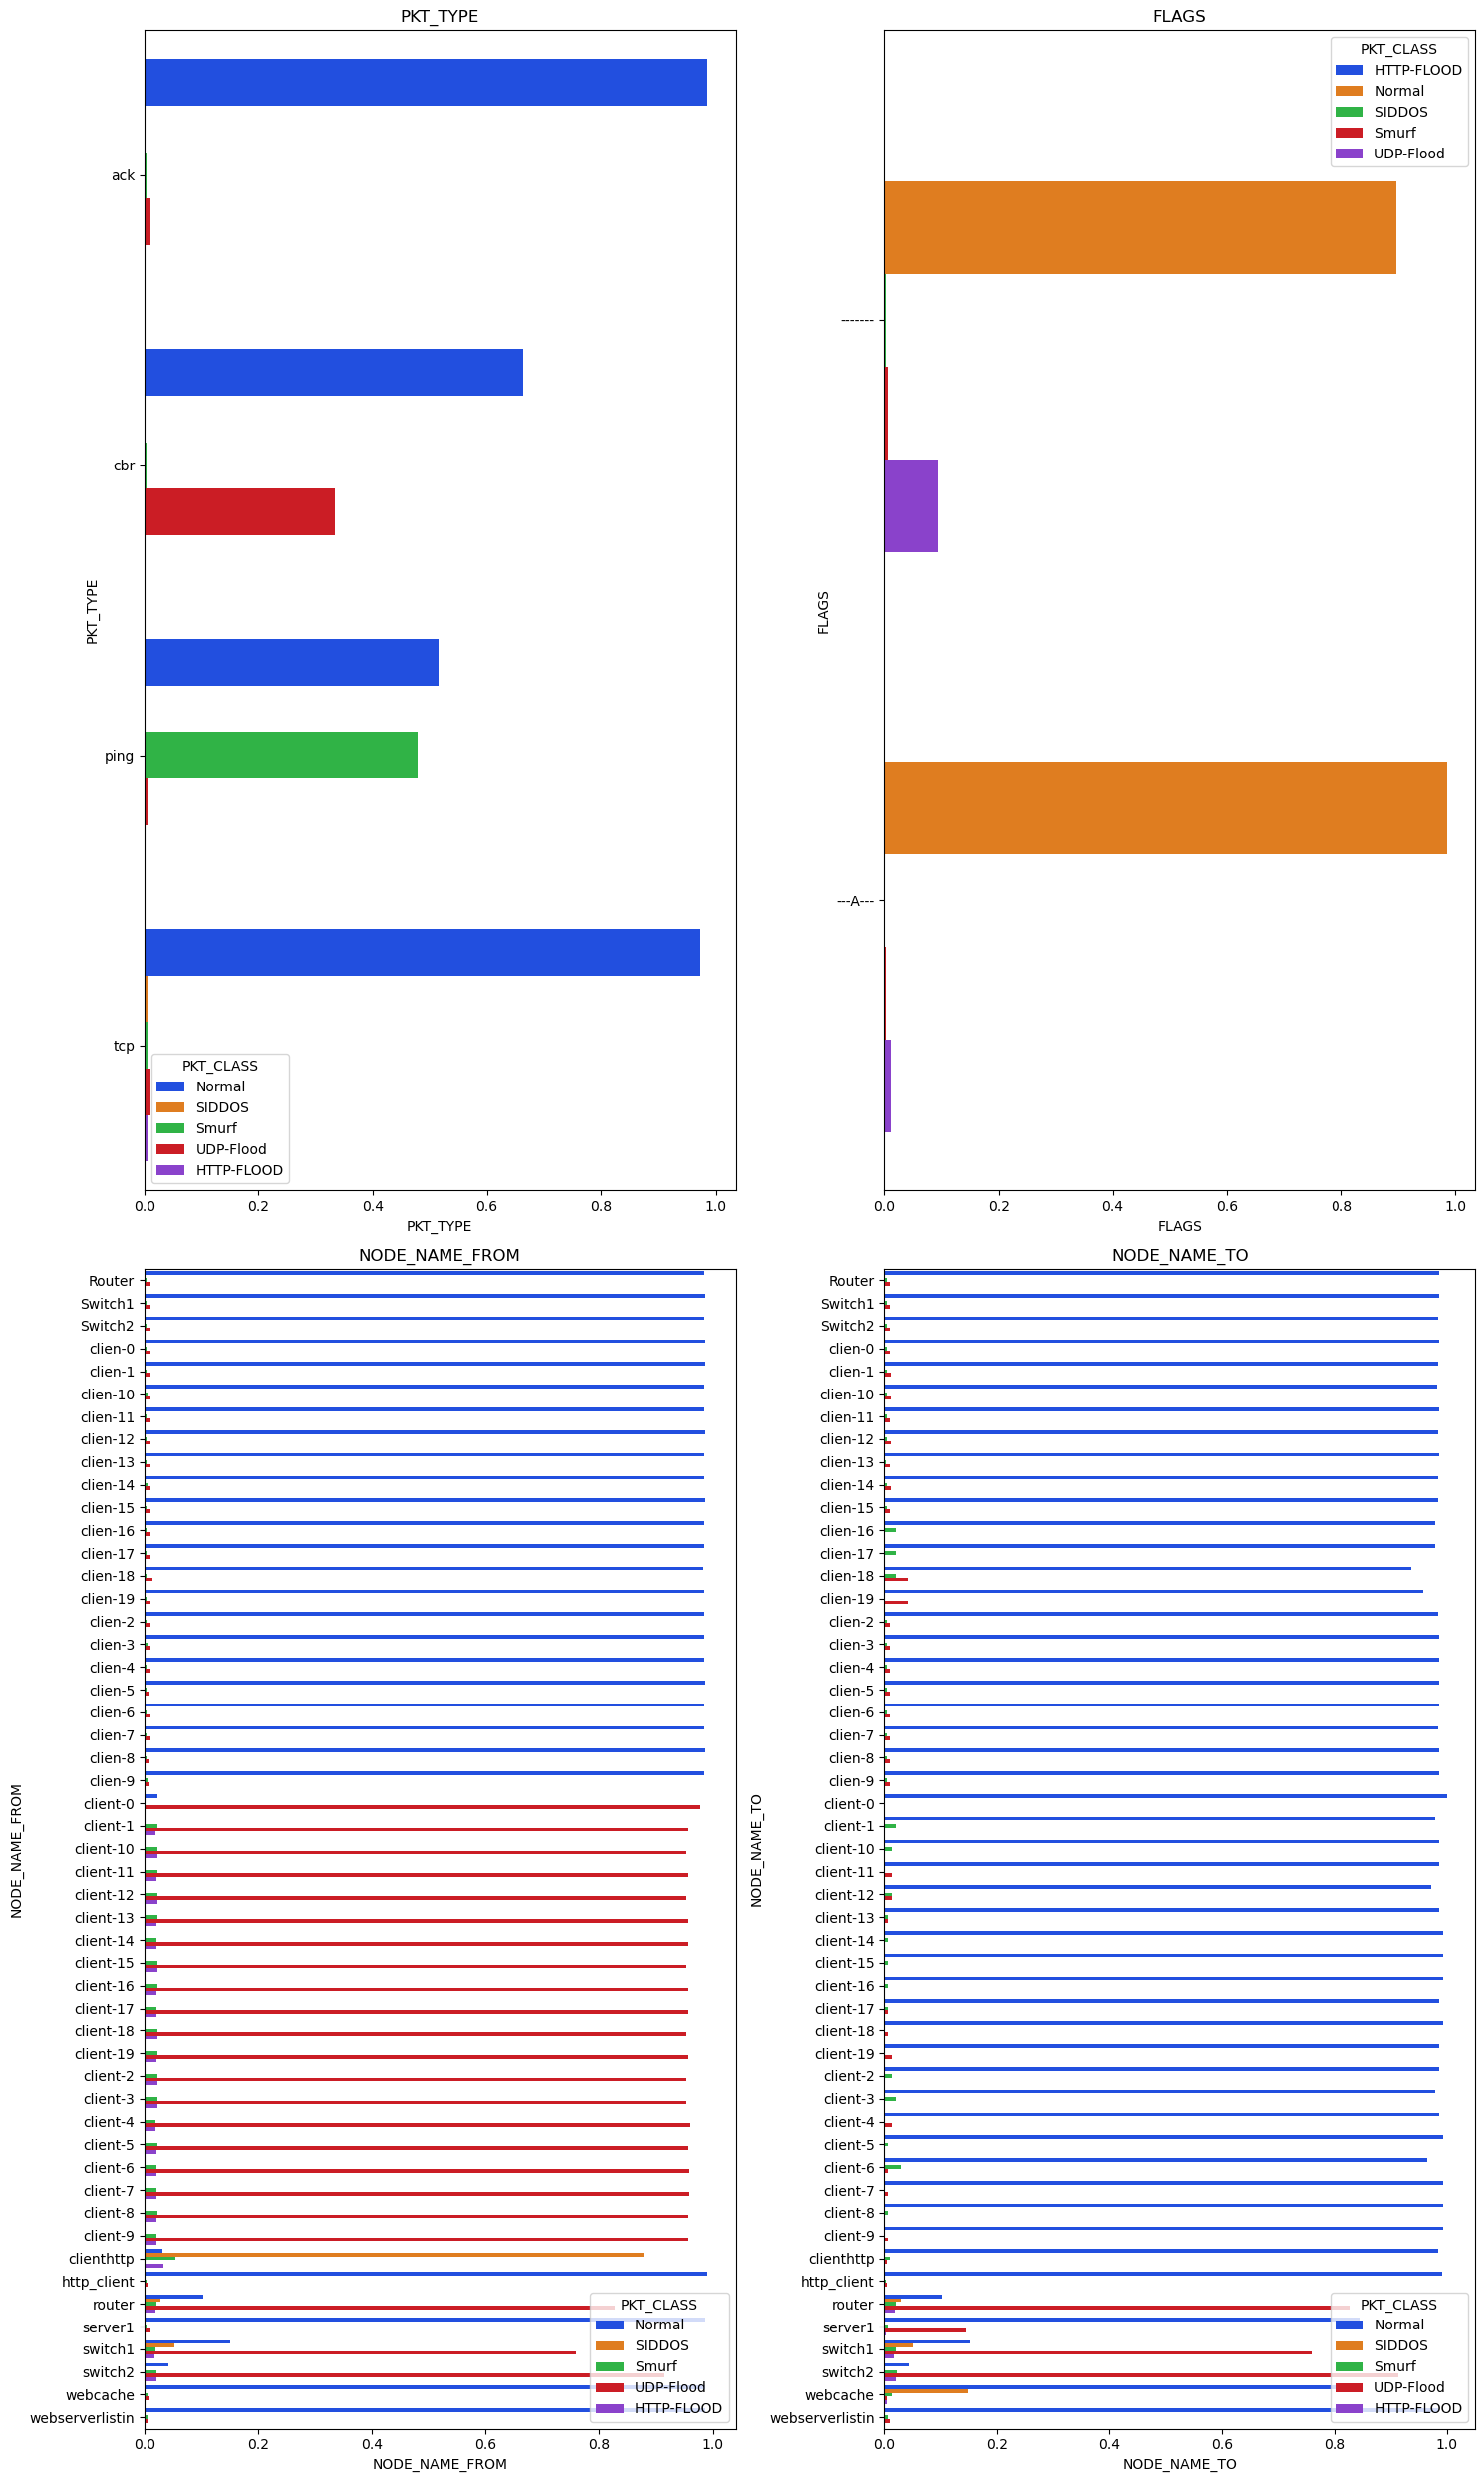

In [52]:
# visualize distribution data in each feature
col_names = categorical_df.columns
plot_num = 1

plt.subplots(2,2, figsize=(15,25))

for column in col_names[:-1]:
    plt.subplot(2,2,plot_num)

    pct_network_df = (categorical_df.groupby([column, 'PKT_CLASS'])[column]
                  .count() / categorical_df.groupby(column)[column].count()).reset_index(name='Percentage')
    
    sns.barplot(y=pct_network_df.columns[0], x=pct_network_df.columns[2], hue=pct_network_df.columns[1], data = pct_network_df, orient='h', errorbar=None, palette='bright')
    
    plot_num +=1
    plt.xlabel(column)
    plt.title(column)
    
plt.tight_layout()
plt.show()

<font color='red'>What we see that: </font>

* Client-0 to Client-19 generated most of the malicious traffic
* Switch-1, Switch-2 and router generated and received most of the malicious traffic
* Sizeble portion of `ping` and `cbr` packet types were used for malicous attacks
* Most of the packets originated from `clienthttp` node were used for `SIDDOS` attack

#### 3.3.4 Bivariate Analysis - Numeric Features

Now we will repeat the process for numeric variables.

In [53]:
# Groupby
network_df1.groupby('PKT_CLASS').mean(numeric_only=True)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
PKT_CLASS,,,,,,,,,,,,,,,,,
HTTP-FLOOD,10.530900,24.320903,37674.932603,18.365937,22.847202,31412.905596,0.000000,1.408759,578.004866,0.014987,26.928764,7.256823e+05,0.063104,0.091904,36.222507,0.064301,12.674448
Normal,14.907160,17.616238,315193.871288,19.738564,20.627485,827.769129,12.525547,20293.422934,13953.603895,0.000806,288.520687,2.324569e+05,0.108115,0.002201,30.630324,5.594551,54.521992
SIDDOS,19.695052,24.652915,81005.515829,21.241260,22.913578,100.236459,0.674119,835.695124,7449.205551,0.000297,104.976245,1.859594e+04,0.009896,0.068330,63.170135,1.436532,74.877048
Smurf,13.654500,19.891608,215931.061795,19.327403,21.372121,21420.942097,8.013582,21169.259651,9231.683638,0.005981,197.478455,6.307281e+05,0.110399,0.034445,33.093795,3.653447,40.378111
UDP-Flood,10.159883,23.837055,67396.131223,18.145820,22.609291,1318.643193,28.693748,2684.934306,9569.803883,0.002646,940.048809,1.271845e+06,0.117692,0.035229,37.266134,1.469260,14.423046


<font color='red'>The initial thoughts about numeric features: </font>

As 99% of the data is `normal` and `UDP-Flood` classes, let's draw our thoughts around them mostly.

- HTTP-FLOOD and Smurf attacks had a way bigger `PKT_SIZE`. </br>
***That's a sign of the malicious traiffc.***
- Normal traffic has higher `number of packet`.
- Number of bytes are similar.
- `PKT_DELAY_NODE`. Normal traffic has lower delay, i.e. reached the destination node faster than malisious traffic.
- Malicous traffic had higher `packet rate`, meaning more packets are sent per unit of time. </br>
***This might be a very good predictor, as DDOS attacks are conducted through sending enormous amount of traffic to take down the server***
- `Byte_rate`. Byte rate, is also higher at malicious traffic. </br>
***Also a good predictor since during the DDOS attacks, higher number of packets involves higher number of Byte_Rate (bytes sent per the unit of time)***
- `Average size of the packet` is lower at normal traffic.
- Not much difference in network utilization. </br>
***This is quite surprising since network utilisation has to be higher for the malicious traffic***
- `PKT_DELAY`. Total travel time from source to desitination of normal network is considerably lower than malicious traffic. </br>
***Due to server gets flooded, malicious traffic generally has higher delay***

In [54]:
# for the bivariate analysis, adding target class to the numeric dataset
numeric_df['PKT_CLASS'] = network_df1['PKT_CLASS']

In [55]:
numeric_df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,1540,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,1540,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,55,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,55,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,55,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,24.10,10.00,43184,22,10,55,11,1343,16103,0.0,328.561918,18070.9,0.008446,0.0,5.305043,1.030013,50.040562,Normal
2160664,24.12,12.00,376386,23,22,55,13,10991,16103,0.0,328.491596,18067.0,0.008446,0.0,34.528655,1.030026,50.051067,Normal
2160665,1.00,24.10,140121,21,23,1540,2,4374,16091,0.0,328.297855,505578.0,0.236321,0.0,14.438258,1.000000,50.013418,Normal
2160666,5.00,24.50,26800,5,21,1540,6,832,16091,0.0,328.204637,505434.0,0.236321,0.0,3.762597,1.000000,50.027339,Normal


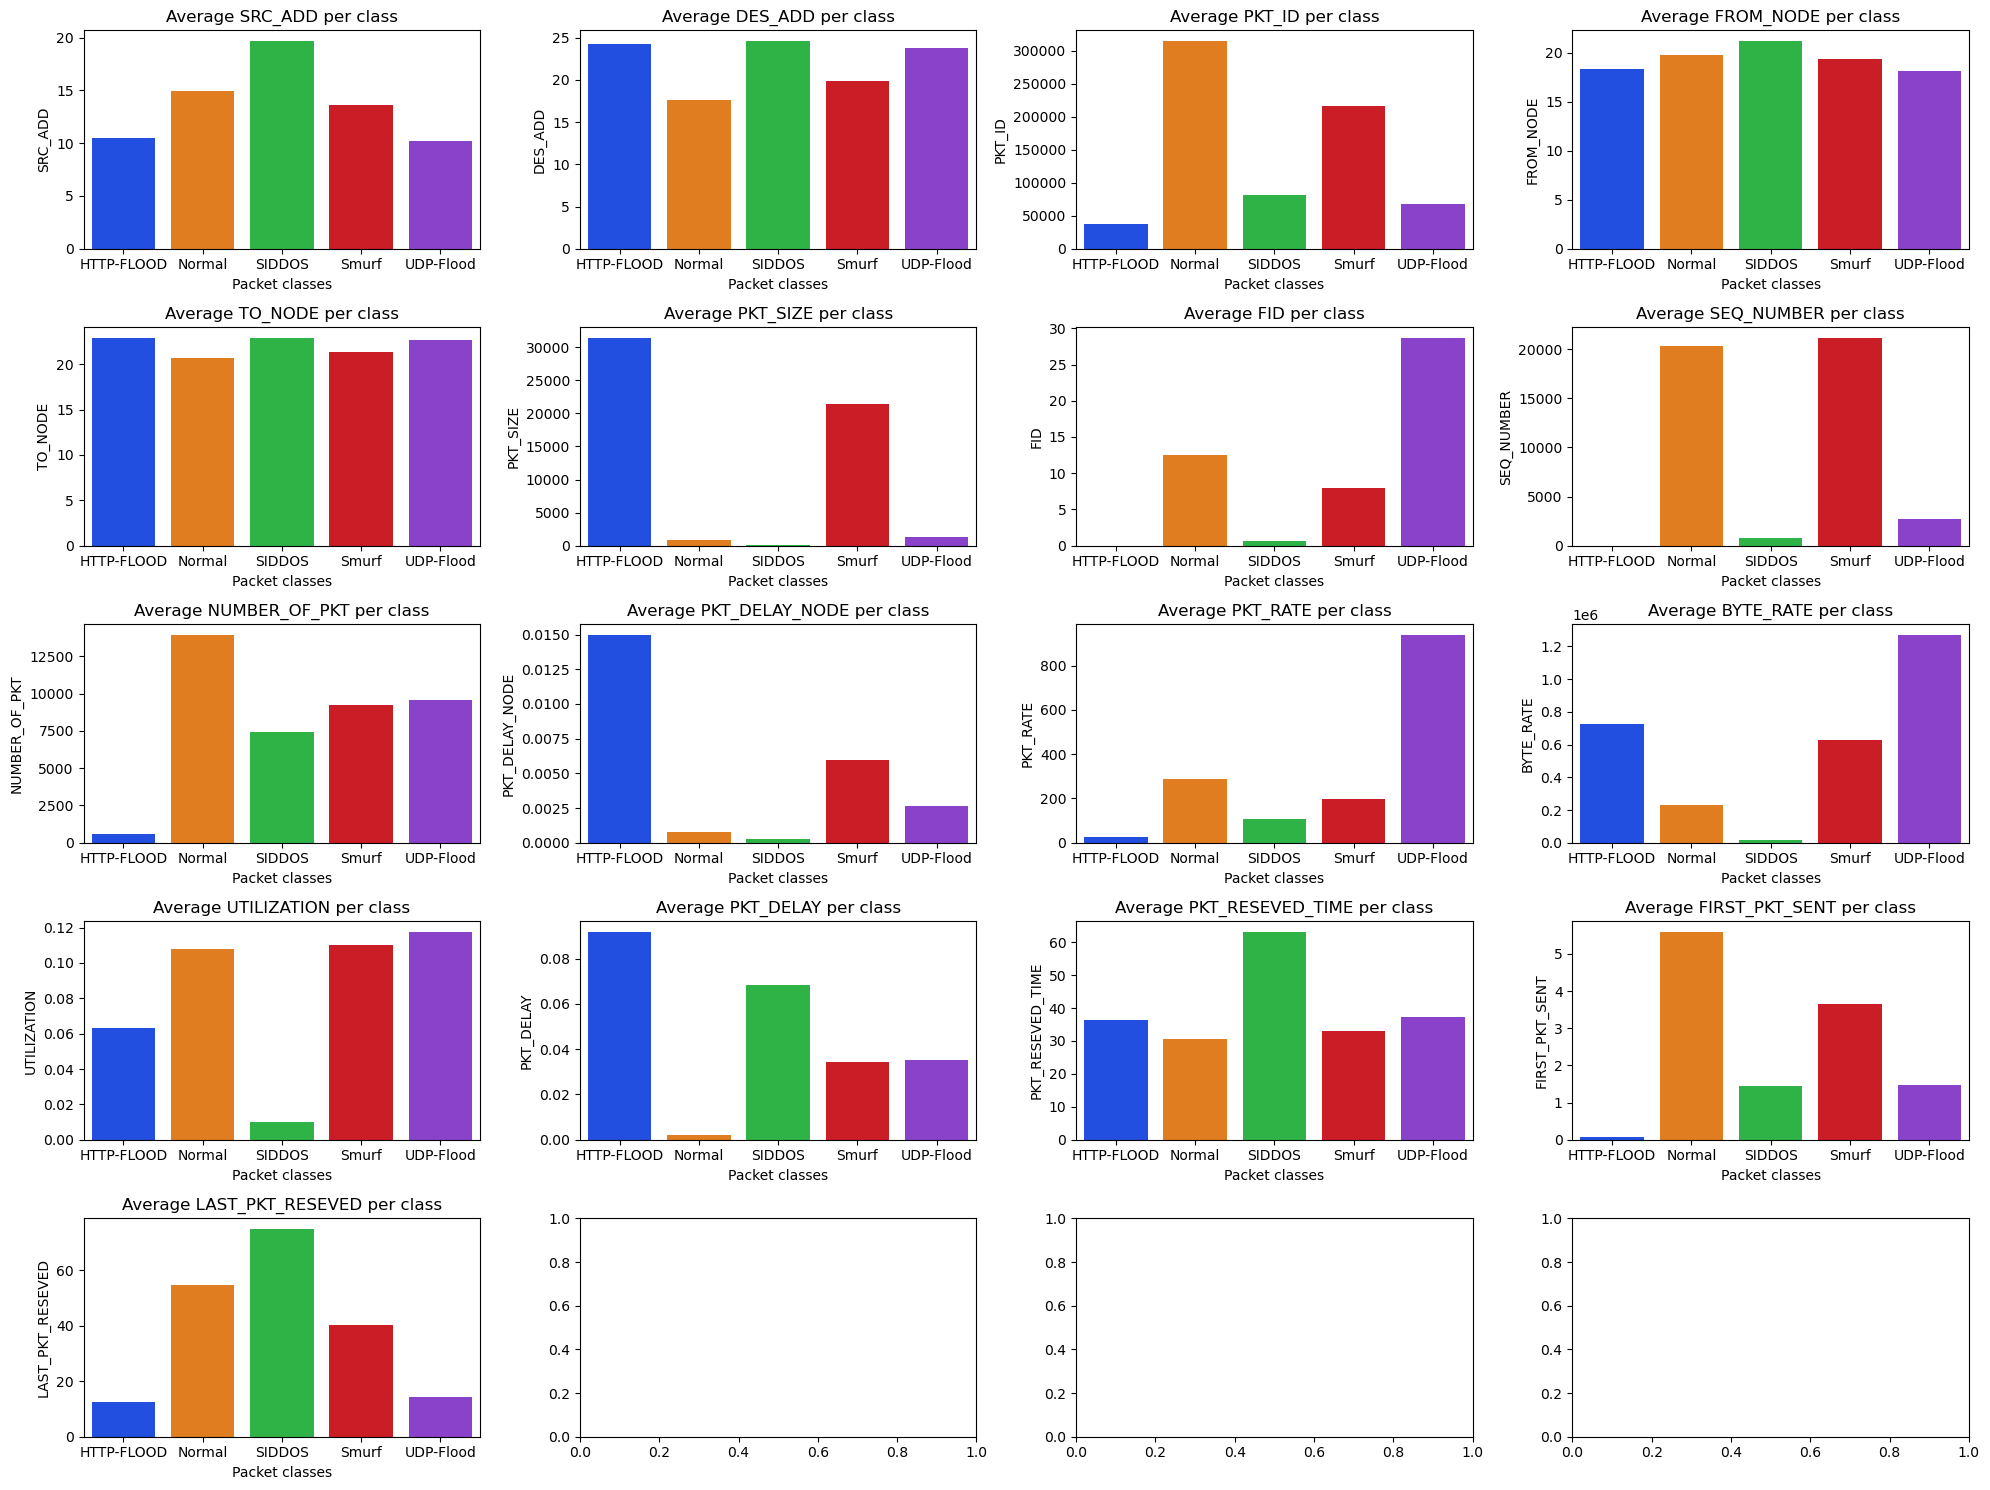

In [56]:
plot_num = 1
plt.subplots(5,4, figsize=(20,15))

for col in numeric_df.iloc[:, :-1]:
    plt.subplot(5,4,plot_num)
    
    df= numeric_df.groupby('PKT_CLASS')[col].mean().reset_index()
    
    sns.barplot(x='PKT_CLASS', y=col, data=df, palette='bright')
    plot_num +=1
    
    plt.xlabel('Packet classes')
    plt.title(f'Average {col} per class')
    
plt.tight_layout()
plt.show()

<font color='red'>The insights drawn**: </font>
* `BYTE_RATE` (row 3, col 4) - As expected, ***UDP-FLOOD packets had higher byte rate*** as DDoS attacks often involve flooding the target network or server with a high volume of traffic. This flood of traffic can lead to a significant increase in the byte rate, as the attacker attempts to consume the available bandwidth and overwhelm the target's resources
* `PKT_RATE` (row 3, col 3). ***Malicious traffic had higher packet rate***. To generate high-volume traffic, DDoS attacks often involve sending a large number of packets to the target within a short period. This results in a higher packet rate, overwhelming the target's processing capacity and network infrastructure

* `PKT_DELAY_NODE`, `Average PKT_DELAY` were ***considerably higer in malicious traffic*** which is common pattern of DDOS attack. Longer delays may occur when network devices (e.g., routers, switches) become overloaded with incoming packets, leading to increased latency or packet loss
* `PKT_SIZE` ***was higher in malicious traffic.*** DDoS attacks may involve sending packets with unusually large sizes, such as oversized ICMP (Ping) packets or fragmented packets. These larger packets can consume more bandwidth and overwhelm network devices or target systems
* `SEQ_NUMBER`  - ***Normal traffic had longer sequence of packets***
* `FID` (Flow ID) had a spike at `UDP_Flood` traffic (row 2, col 3)
* `SRC_ADD` and `DEST_ADD` - features seeem not to be significant as predictor
* `PKT_ID`- is the ID and doesn't seem to be significant as predictor
* `FROM_NODE` and `TO_NODE` - look very similar across all packet classes and also not seem to be significant predictors
* `FIRST_PKT_SENT` and `LAST_PKT_RESEVED` - ***UDP-Flood and Normal traffic have big difference***
* `PKT_RESEVED_TIME` - relatively similar avg value across all classes, with spike at SIDDOS
* `UTILIZATION` - Normal and UDP-Flood had comparable network utilisation rate


Let's look at the distribution of independent variables for each target class using boxplot and see if there are some outliers.

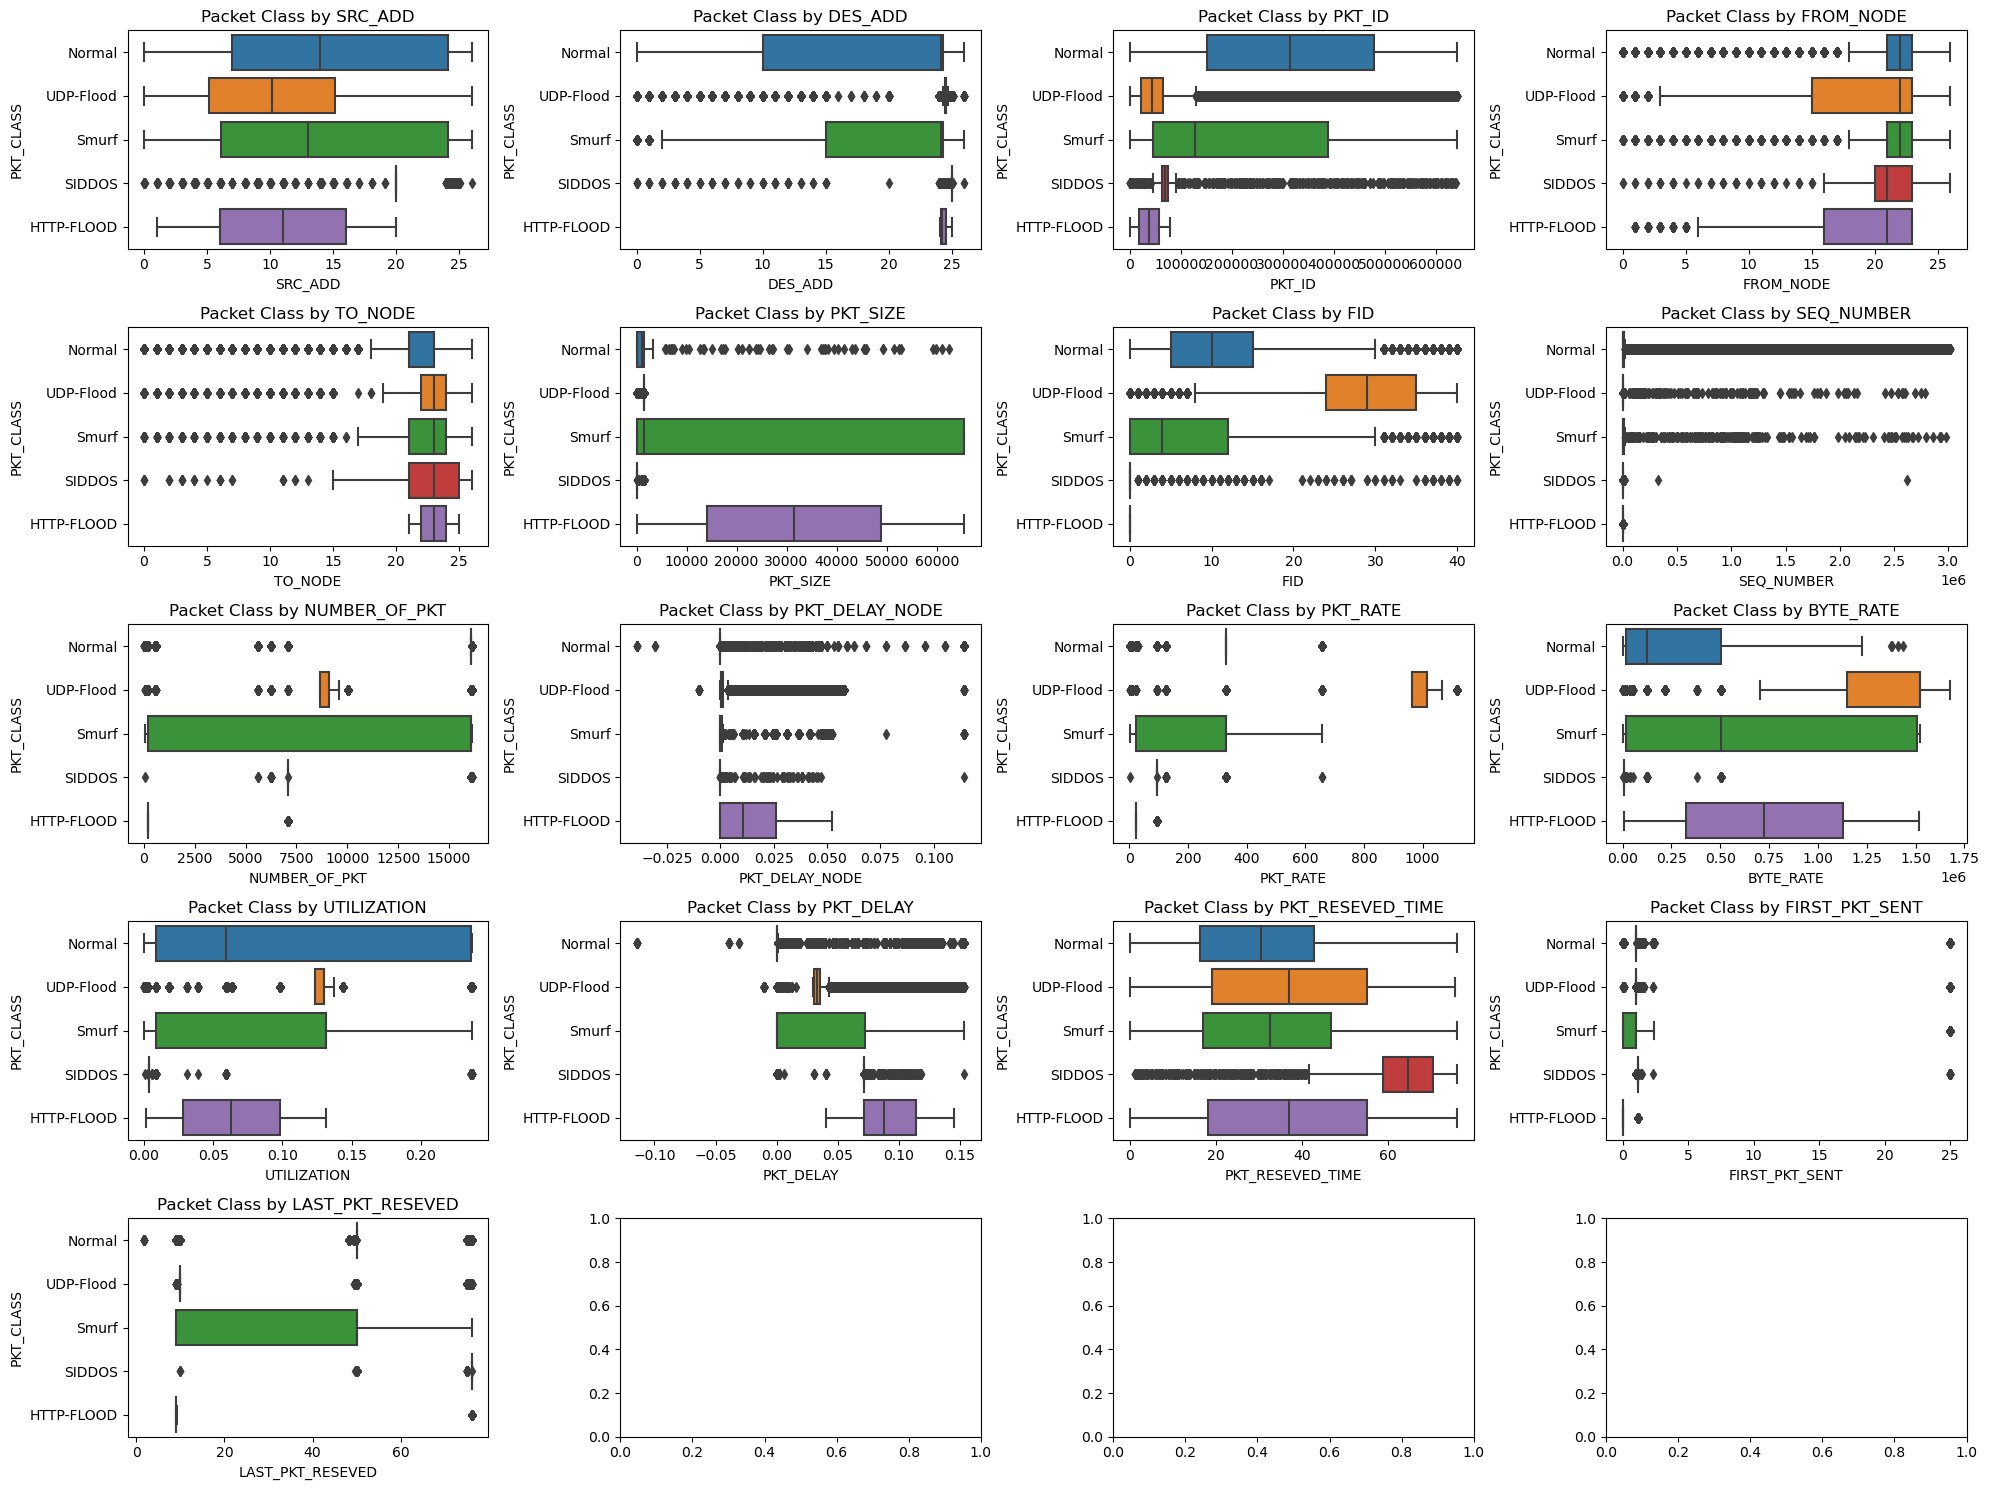

In [57]:
plot_num = 1
plt.subplots(5,4, figsize=(20,15))

for col in numeric_df.iloc[:, :-1]:
    plt.subplot(5,4,plot_num)
    plot_num +=1
    sns.boxplot(x=col, y='PKT_CLASS', data=network_df1)
    plt.title(f'Packet Class by {col}')
    
plt.tight_layout()
plt.show()

* Upper ~ 50% (Q3-Q4) of `UDP-Flood` traffic were sending ***~1000 packet per second, that might be the indicator of the malicious attack.***
* It is clearly seen that UDP-Flood traffic had higer byte rates
* Normal traffic had great number of outlier packet size, whereas UDP_Flood packet almost equally distributed among all 4 quartiles
* SMURF had greater range of packet sizes at the 4th quartile

#### 3.3.5. Drop the features

Based on the domain knowledge and insights from the analysis, the following features will be dropped: `SRC_ADD`, `DES_ADD`, `PKT_ID`, `FROM_NODE`, `TO_NODE`.

`SRC_ADD` and `DES_ADD` are just names of the source and destination, and does not add any important information to the network flow.
`PKT_ID` is the ID of packets and doesn't have any predictive nature (presumably).
`FROM_NODE` and `TO_NODE` are just names of the nodes and don't add any predictive power to the model

In [58]:
network_df2 = network_df1.drop(columns=['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE'])

In [59]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_TYPE          object 
 1   PKT_SIZE          int64  
 2   FLAGS             object 
 3   FID               int64  
 4   SEQ_NUMBER        int64  
 5   NUMBER_OF_PKT     int64  
 6   NODE_NAME_FROM    object 
 7   NODE_NAME_TO      object 
 8   PKT_DELAY_NODE    float64
 9   PKT_RATE          float64
 10  BYTE_RATE         float64
 11  UTILIZATION       float64
 12  PKT_DELAY         float64
 13  PKT_RESEVED_TIME  float64
 14  FIRST_PKT_SENT    float64
 15  LAST_PKT_RESEVED  float64
 16  PKT_CLASS         object 
dtypes: float64(8), int64(4), object(5)
memory usage: 280.2+ MB


### EDA Summary 

Ended up with 15 features down from 28 initial. 4 object and 11 numeric.  

From our initial analysis let's summarize what we have found out:

* Only 10% of data is of target value. We might need to merge all attack classes into one to get more balanced dataset.
* Data is relatively clean.
* Some key fields like IP, timestamps have been anonymized due to sensitivity.
* PKT_RATE, BYTE_RATE, PKT_DELAY were identified as potential strong predictors of the malicious traffic.
* Ping and cbr packets were used more than other types of packets for network attack purposes. Adversaries had used light or empty packets to conduct attacks. So, that might have been done to evade security solutions like Anti-Virus and Firewall which thoroughly examine payload.
* There is no any particular node that had initiated network attacks more than others, so all clients relativelly equally generated malicious traffic.

## 4. Preprocessing

### 4.1 Converting categorical features to numeric

In [1]:
network_df2.info()

NameError: name 'network_df2' is not defined

We will create dummy variables for the categorical features. The first newly created dummy variable will be removed to avoid multicollinearity between dummy variables.

In [61]:
dummy_pkt_type = pd.get_dummies(data=network_df2['PKT_TYPE'], prefix='pkt_type_',drop_first=True).astype(int)

In [62]:
dummy_pkt_type

,pkt_type__cbr,pkt_type__ping,pkt_type__tcp
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2160663,0,0,0
2160664,0,0,0
2160665,0,0,1
2160666,0,0,1


For the `FLAGS`, the values will be transformed into binary since there are only 2 unique values.

In [63]:
 network_df2['FLAGS'].value_counts()

-------    2159876
---A---        792
Name: FLAGS, dtype: int64

In [64]:
network_df2['FLAGS'] = network_df2['FLAGS'].replace({"-------":1, "---A---":0})

In [65]:
 network_df2['FLAGS']

0          1
1          1
2          1
3          1
4          1
          ..
2160663    1
2160664    1
2160665    1
2160666    1
2160667    1
Name: FLAGS, Length: 2160668, dtype: int64

In [66]:
network_df2['NODE_NAME_FROM'].value_counts()

Router             641580
Switch1            385484
server1            260428
Switch2            256096
router              73004
switch1             40447
switch2             32556
clien-11            22353
clien-13            22353
clien-14            22353
clien-10            22353
clien-12            22353
clien-15            22342
clien-1             22341
clien-5             22341
clien-2             22341
clien-0             22341
clien-6             22341
clien-3             22341
clien-4             22341
clien-7             22340
clien-8             22338
clien-9             22335
webserverlistin     11264
webcache            10948
clien-17             6299
clien-19             6298
clien-16             6297
clien-18             6297
client-4             3490
client-6             3336
client-7             3336
client-14            3176
client-19            3176
client-9             3176
client-11            3176
client-13            3176
client-8             3176
client-16   

As the number of unique values are high, we will bin them into the smaller groups. The groups would be `Server`, `Client`, `Router`, `Switch`.

In [67]:
def map_values(host_name):
    
    if 'server' in host_name or 'webcache' in host_name:
        return 'Server'
    elif 'clien' in host_name:
        return 'Client'
    elif 'router' in host_name or 'Router' in host_name:
        return 'Router'
    elif 'switch' in host_name or 'Switch' in host_name:
        return 'Switch'

In [68]:
network_df2['NODE_NAME_FROM'] = network_df2['NODE_NAME_FROM'].apply(map_values)

In [69]:
network_df2['NODE_NAME_FROM']

0          Switch
1          Router
2          Router
3          Router
4          Router
            ...  
2160663    Switch
2160664    Router
2160665    Switch
2160666    Client
2160667    Switch
Name: NODE_NAME_FROM, Length: 2160668, dtype: object

In [70]:
network_df['NODE_NAME_FROM']

0          Switch1
1           Router
2           Router
3           Router
4           Router
            ...   
2160663    Switch2
2160664     Router
2160665    Switch1
2160666    clien-5
2160667    Switch2
Name: NODE_NAME_FROM, Length: 2160668, dtype: object

In [71]:
network_df2['NODE_NAME_FROM'].value_counts()

Router    714584
Switch    714583
Client    448861
Server    282640
Name: NODE_NAME_FROM, dtype: int64

In [72]:
dummy_node_from = pd.get_dummies(data=network_df2['NODE_NAME_FROM'], prefix='from_', drop_first=True).astype(int)

We will apply the same operation on `NODE_NAME_TO`

In [73]:
network_df2['NODE_NAME_TO'].value_counts()

Router             641580
server1            445876
Switch1            385484
Switch2            256096
router              73013
switch1             40452
switch2             32556
clien-12            16103
clien-11            16103
clien-13            16103
clien-10            16103
clien-14            16103
clien-15            16092
clien-4             16091
clien-0             16091
clien-2             16091
clien-6             16091
clien-3             16091
clien-5             16091
clien-1             16091
clien-7             16090
clien-8             16088
clien-9             16085
webcache            14245
webserverlistin      5641
clienthttp           4734
http_client           563
client-10             140
client-6              140
client-8              140
client-14             140
client-11             140
client-5              140
client-2              140
client-18             140
client-16             140
client-7              140
client-12             140
client-3    

In [74]:
network_df2['NODE_NAME_TO'] = network_df2['NODE_NAME_TO'].apply(map_values)

In [75]:
network_df2['NODE_NAME_TO'].value_counts()

Router    714593
Switch    714588
Server    465762
Client    265725
Name: NODE_NAME_TO, dtype: int64

In [76]:
dummy_node_to = pd.get_dummies(data=network_df2['NODE_NAME_TO'], prefix='to_', drop_first=True).astype(int)

In [77]:
dummy_node_to

,to__Router,to__Server,to__Switch
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2160663,0,0,0
2160664,0,0,1
2160665,1,0,0
2160666,0,0,1


In [78]:
#combine dummy datasets with the original data

network_df2  = pd.concat(objs=[network_df2, dummy_pkt_type, dummy_node_to, dummy_node_from], axis=1)

In [79]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_TYPE          object 
 1   PKT_SIZE          int64  
 2   FLAGS             int64  
 3   FID               int64  
 4   SEQ_NUMBER        int64  
 5   NUMBER_OF_PKT     int64  
 6   NODE_NAME_FROM    object 
 7   NODE_NAME_TO      object 
 8   PKT_DELAY_NODE    float64
 9   PKT_RATE          float64
 10  BYTE_RATE         float64
 11  UTILIZATION       float64
 12  PKT_DELAY         float64
 13  PKT_RESEVED_TIME  float64
 14  FIRST_PKT_SENT    float64
 15  LAST_PKT_RESEVED  float64
 16  PKT_CLASS         object 
 17  pkt_type__cbr     int32  
 18  pkt_type__ping    int32  
 19  pkt_type__tcp     int32  
 20  to__Router        int32  
 21  to__Server        int32  
 22  to__Switch        int32  
 23  from__Router      int32  
 24  from__Server      int32  
 25  from__Switch      int32  
dtypes: float64(8),

In [80]:
network_df2.head()

,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NODE_NAME_FROM,NODE_NAME_TO,PKT_DELAY_NODE,PKT_RATE,...,PKT_CLASS,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
0,tcp,1540,1,4,11339,16091,Switch,Router,0.0,328.240918,...,Normal,0,0,1,1,0,0,0,0,1
1,tcp,1540,1,16,6274,16092,Router,Server,0.0,328.205808,...,Normal,0,0,1,0,1,0,1,0,0
2,ack,55,1,16,1930,16092,Router,Switch,0.0,328.206042,...,UDP-Flood,0,0,0,0,0,1,1,0,0
3,ack,55,1,10,12670,16085,Router,Switch,0.0,328.064183,...,Normal,0,0,0,0,0,1,1,0,0
4,ack,55,1,9,4901,16088,Router,Switch,0.0,328.113525,...,Normal,0,0,0,0,0,1,1,0,0


In [81]:
# drop the original categorical columns
network_df2.drop(columns=['PKT_TYPE', 'NODE_NAME_TO', 'NODE_NAME_FROM'], inplace=True)

### 4.2 Merge the malicious classes together and write the preprocessed data into a csv file

In [82]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_SIZE          int64  
 1   FLAGS             int64  
 2   FID               int64  
 3   SEQ_NUMBER        int64  
 4   NUMBER_OF_PKT     int64  
 5   PKT_DELAY_NODE    float64
 6   PKT_RATE          float64
 7   BYTE_RATE         float64
 8   UTILIZATION       float64
 9   PKT_DELAY         float64
 10  PKT_RESEVED_TIME  float64
 11  FIRST_PKT_SENT    float64
 12  LAST_PKT_RESEVED  float64
 13  PKT_CLASS         object 
 14  pkt_type__cbr     int32  
 15  pkt_type__ping    int32  
 16  pkt_type__tcp     int32  
 17  to__Router        int32  
 18  to__Server        int32  
 19  to__Switch        int32  
 20  from__Router      int32  
 21  from__Server      int32  
 22  from__Switch      int32  
dtypes: float64(8), int32(9), int64(5), object(1)
memory usage: 305.0+ MB


In [83]:
network_df2['PKT_CLASS'].value_counts()

Normal        1935959
UDP-Flood      201344
Smurf           12590
SIDDOS           6665
HTTP-FLOOD       4110
Name: PKT_CLASS, dtype: int64

As the dataset is imbalanced, we will merge all malicious traffic classes into one

In [84]:
network_df2['PKT_CLASS'] = network_df2['PKT_CLASS'].replace(to_replace= ['Normal', 'UDP-Flood','Smurf', 'SIDDOS', 'HTTP-FLOOD'], value= ['Normal', 'Malicious', 'Malicious', 'Malicious','Malicious'])

In [85]:
network_df2['PKT_CLASS'].value_counts()

Normal       1935959
Malicious     224709
Name: PKT_CLASS, dtype: int64

In [86]:
# set malicious traffic as our positive class
network_df2['PKT_CLASS']=network_df2['PKT_CLASS'].replace({'Normal':0, 'Malicious':1})

In [87]:
network_df2['PKT_CLASS'].head()

0    0
1    0
2    1
3    0
4    0
Name: PKT_CLASS, dtype: int64

Once we finished data preprocessing stage and before starting to split the data, let's write to external CSV file, so we can get back to the version of the file.

In [88]:
network_df2.to_csv('network_preprocessed.csv', index=False)

In [9]:
network_df2=pd.read_csv('network_preprocessed.csv')

In [10]:
network_df2.shape

(2160668, 23)